In [40]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
    
# fix random seed for reproducibility
np.random.seed(7)


In [41]:
curve = np.vectorize(lambda x: x*10)

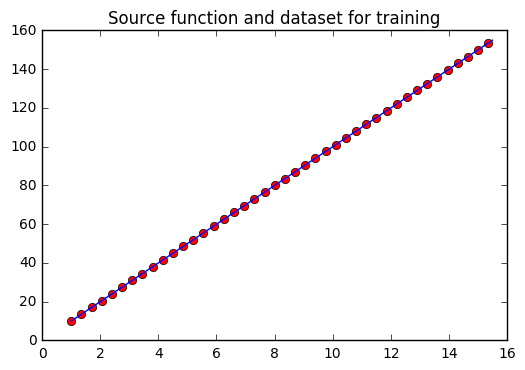

In [42]:
# Prepare our data and make chart
Xideal = np.arange(1, 15.5, 0.005)
Yideal = curve(Xideal)
X = Xideal[1::70]
Y = curve(X)
plt.title('Source function and dataset for training')
plt.plot(X, Y, 'ro')
plt.plot(Xideal, Yideal)
plt.show()


In [43]:
# Define model
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=1))

# Compile it
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# Fit
model.fit(X, Y, nb_epoch=1000, batch_size=50, verbose=2)

# Evaluate the model
scores = model.evaluate(Xideal, Yideal)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


Epoch 1/1000
0s - loss: 5975.5474 - mean_squared_error: 5975.5474
Epoch 2/1000
0s - loss: 3046.3208 - mean_squared_error: 3046.3208
Epoch 3/1000
0s - loss: 1553.0394 - mean_squared_error: 1553.0394
Epoch 4/1000
0s - loss: 791.7833 - mean_squared_error: 791.7833
Epoch 5/1000
0s - loss: 403.7051 - mean_squared_error: 403.7051
Epoch 6/1000
0s - loss: 205.8672 - mean_squared_error: 205.8672
Epoch 7/1000
0s - loss: 105.0115 - mean_squared_error: 105.0115
Epoch 8/1000
0s - loss: 53.5960 - mean_squared_error: 53.5960
Epoch 9/1000
0s - loss: 27.3846 - mean_squared_error: 27.3846
Epoch 10/1000
0s - loss: 14.0218 - mean_squared_error: 14.0218
Epoch 11/1000
0s - loss: 7.2091 - mean_squared_error: 7.2091
Epoch 12/1000
0s - loss: 3.7356 - mean_squared_error: 3.7356
Epoch 13/1000
0s - loss: 1.9643 - mean_squared_error: 1.9643
Epoch 14/1000
0s - loss: 1.0609 - mean_squared_error: 1.0609
Epoch 15/1000
0s - loss: 0.5998 - mean_squared_error: 0.5998
Epoch 16/1000
0s - loss: 0.3643 - mean_squared_error: 

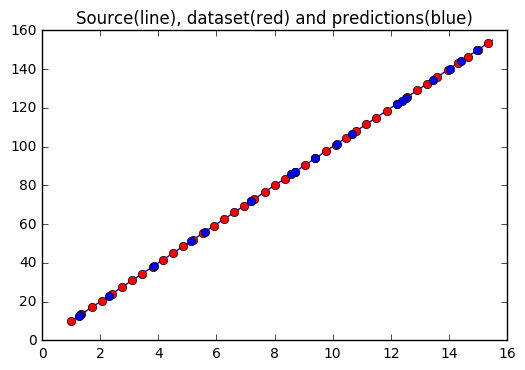

In [22]:
Xsample = np.random.choice(Xideal, size=20)
Ysample = model.predict(Xsample)[:,0]
plt.title('Source(line), dataset(red) and predictions(blue)')
plt.plot(Xideal, Yideal)
plt.plot(X, Y, 'ro')
plt.plot(Xsample, Ysample, 'bo')
plt.show()

In [39]:
predictions = model.predict(Xideal)[:,0]
print(np.shape(Yideal), np.shape(predictions))
diff = np.vectorize(lambda x: "%.3f" % (x) )
sample = np.stack([Yideal, predictions, diff(abs(Yideal-predictions))], axis=-1)
print(c, np.shape(sample))
#print(predictions, Yideal)

(2900,) (2900,)
[['10.0' '10.014037132263184' '0.014']
 ['10.049999999999999' '10.064029693603516' '0.014']
 ['10.099999999999998' '10.114022254943848' '0.014']
 ..., 
 ['154.8499999999969' '154.84230041503906' '0.008']
 ['154.8999999999969' '154.8922882080078' '0.008']
 ['154.94999999999692' '154.94229125976562' '0.008']] (2900, 3)
